In [43]:
import os
import matplotlib.pyplot as plt
root = ''
chapter_id = 'MNIST'
images_path= os.path.join(root,'images',chapter_id,)
os.makedirs(images_path,exist_ok=True)
def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=True):
    path = os.path.join(images_path,fig_id+'.'+fig_extension)
    print('save figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)
        

In [44]:
# load data MNIST
import tensorflow as tf
import keras

fashion_MNIST = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_MNIST.load_data()

In [45]:
import numpy as np
import pandas as pd
# cek verion
tf.__version__

'2.9.1'

In [46]:
keras.__version__

'2.9.0'

look a range data sets from x_train

In [47]:
X_train_full.shape # 3 dimensi

(60000, 28, 28)

60.000 grayscale images dengan 28 x 28 pixels
1 pixel intensity merepresentasikan sebagai byte (0 to 255)

In [48]:
X_train_full.dtype

dtype('uint8')

In [49]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [50]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [51]:
X_valid, X_train = (X_train_full[:5000] / 255.) , (X_train_full[5000:] / 255.)
y_valid, y_train = (y_train_full[:5000]), (y_train_full[5000:])
X_test = X_test / 255.

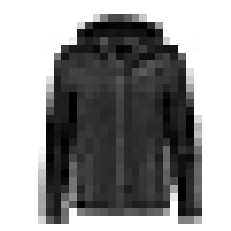

In [54]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()